<a href="https://colab.research.google.com/github/dimou-gk/Deep-dive-ML/blob/main/Feature_Importance_Dimensionality_Reduction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset & Analysis

In [5]:
df = pd.read_csv('/content/drive/MyDrive/MSc Data and Web Science/Machine Learning/Exercise 6/wine-full.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# 2-3. Preprocessing & Training

In [6]:
df.loc[df['type'] == 'unknown','type'] = 2
df.loc[df['type'] == 'red','type'] = 1
df.loc[df['type'] == 'white','type'] = 0

df.dropna(inplace=True)

In [7]:
columns = df.drop(columns='quality').columns

x = df.drop(columns='quality').to_numpy()
y = df['quality'].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5170, 12), (1293, 12), (5170,), (1293,))

In [8]:
model_Lasso = Lasso(alpha=0.001, random_state=0)
model_Random = RandomForestRegressor(random_state=0)

model_Lasso.fit(x_train, y_train)
model_Random.fit(x_train, y_train)

y_pred_Lasso = model_Lasso.predict(x_test)
y_pred_Random = model_Random.predict(x_test)

MAE_Lasso = mean_absolute_error(y_test, y_pred_Lasso)
MAE_Random = mean_absolute_error(y_test, y_pred_Random)

R2_Lasso = r2_score(y_test, y_pred_Lasso)
R2_Random = r2_score(y_test, y_pred_Random)

print(f'MAE for Lasso is: {MAE_Lasso}')
print(f'MAE for Random Forest is: {MAE_Random}')
print(f'R2 for Lasso is: {R2_Lasso}')
print(f'R2 for Random is: {R2_Random}')

MAE for Lasso is: 0.5625369386586324
MAE for Random Forest is: 0.4252590873936582
R2 for Lasso is: 0.2816435046045367
R2 for Random is: 0.490880633613625


Both of those metrics showcased the superior performance of Random Forest, as MAE is better when lower and R2 is better when close to 1

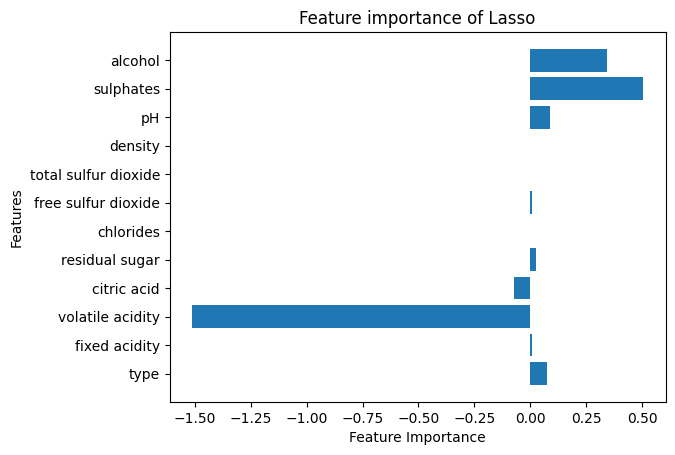

<Figure size 1000x1000 with 0 Axes>

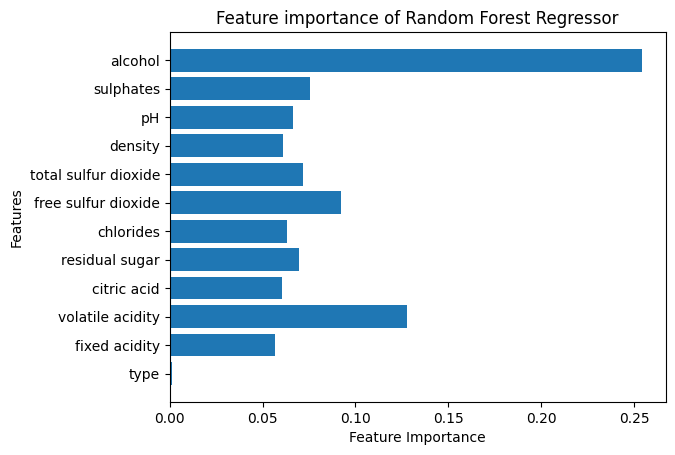

<Figure size 1000x1000 with 0 Axes>

In [9]:
features_Lasso = model_Lasso.coef_
features_Random = model_Random.feature_importances_

plt.barh(columns, features_Lasso)
plt.title('Feature importance of Lasso')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.figure(figsize=(10,10))
plt.show()

plt.barh(columns, features_Random)
plt.title('Feature importance of Random Forest Regressor')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.figure(figsize=(10,10))
plt.show()

# 4-5 Permutation Importance

Mean of our metric over 30 repeats is:[0.05769939 0.04025313 0.15588758 0.00038627 0.25346685 0.00321004
 0.02010556 0.01542573 0.2662054  0.01642696 0.03126947 0.17815629]
Standart deviation of our metric over 30 repeats is:[0.00444386 0.0030695  0.00611932 0.00030854 0.01008328 0.00090826
 0.00255761 0.00217973 0.01002031 0.00229006 0.00274397 0.00762931]


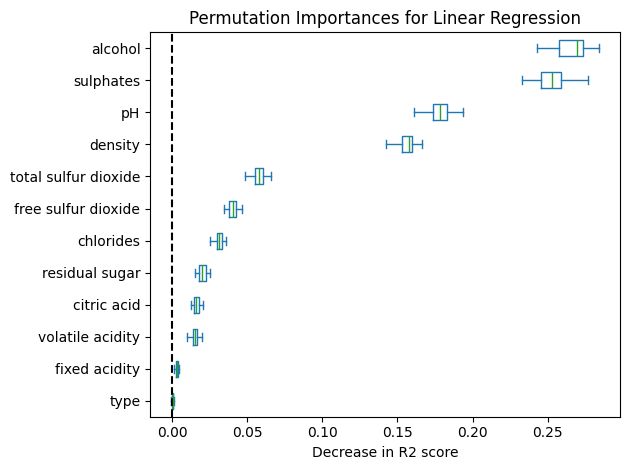

In [10]:
model_Linear = LinearRegression()
model_Linear.fit(x_train, y_train)

y_pred_Linear = model_Linear.predict(x_test)

# R2_Linear = r2_score(y_test, y_pred_Linear)
# print(f'R2 for Linear is: {R2_Linear}')

perm_import = permutation_importance(model_Linear, x_train, y_train, random_state=0, scoring='r2', n_repeats=30)

print(f'Mean of our metric over 30 repeats is:{perm_import.importances_mean}')
print(f'Standart deviation of our metric over 30 repeats is:{perm_import.importances_std}')


sorted_importances_idx = perm_import.importances_mean.argsort()
importances = pd.DataFrame(
    perm_import.importances[sorted_importances_idx].T,
    columns=columns,
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances for Linear Regression")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")
ax.figure.tight_layout()

Mean of our metric over 30 repeats is:[2.62551596e-03 1.06983754e-04 1.60702806e-01 4.37153208e-04
 3.56289530e-02 0.00000000e+00 2.81847133e-02 2.85082999e-02
 0.00000000e+00 7.01236035e-04 1.53007790e-02 4.33805180e-01]
Standart deviation of our metric over 30 repeats is:[0.00093395 0.00020411 0.00625564 0.00025203 0.00374067 0.
 0.00298879 0.00301076 0.         0.00039036 0.00184461 0.01222154]
-----------------------------------------------------------------------
Mean of our metric over 30 repeats is:[0.00152056 0.08325473 0.40170964 0.09894436 0.11870171 0.11121885
 0.24871956 0.13590134 0.0914584  0.10471514 0.17676984 0.76058795]
Standart deviation of our metric over 30 repeats is:[0.00011046 0.00178136 0.00855556 0.00192935 0.00146135 0.00209902
 0.00578637 0.00235036 0.001479   0.00183891 0.00342667 0.01262893]


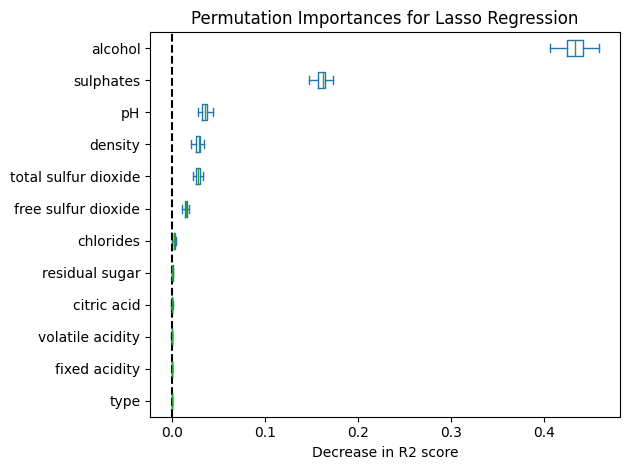

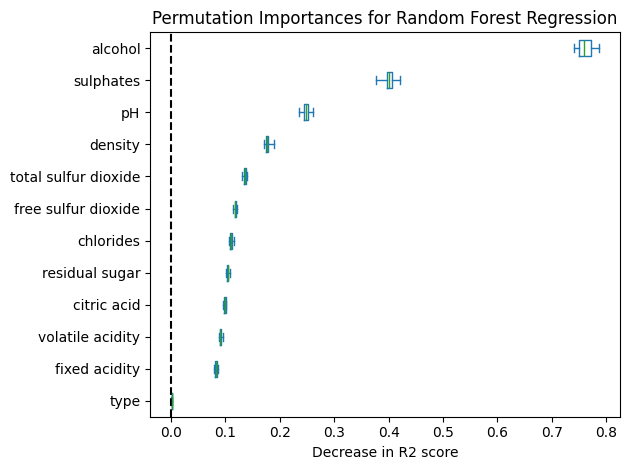

In [11]:
perm_import = permutation_importance(model_Lasso, x_train, y_train, random_state=0, scoring='r2', n_repeats=30)

print(f'Mean of our metric over 30 repeats is:{perm_import.importances_mean}')
print(f'Standart deviation of our metric over 30 repeats is:{perm_import.importances_std}')


sorted_importances_idx = perm_import.importances_mean.argsort()
importances = pd.DataFrame(
    perm_import.importances[sorted_importances_idx].T,
    columns=columns,
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances for Lasso Regression")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")
ax.figure.tight_layout()

print('-----------------------------------------------------------------------')
perm_import = permutation_importance(model_Random, x_train, y_train, random_state=0, scoring='r2', n_repeats=30)

print(f'Mean of our metric over 30 repeats is:{perm_import.importances_mean}')
print(f'Standart deviation of our metric over 30 repeats is:{perm_import.importances_std}')


sorted_importances_idx = perm_import.importances_mean.argsort()
importances = pd.DataFrame(
    perm_import.importances[sorted_importances_idx].T,
    columns=columns,
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances for Random Forest Regression")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")
ax.figure.tight_layout()

Based on the plots, the 3 most important features identified by Permutation Importance are Alcohol, Sulphates, and pH for both models. This conclusion is supported by observing a decrease in the R² score when these features are permuted in the dataset.

However, the results obtained from the coef_/feature importance of Lasso and Random Forest differ slightly. While Lasso identifies the same 3 features as the most important, Random Forest highlights Free Sulfur Dioxide and Volatile Acidity instead.

Another approach used to get the best 3 features, can be filter methods which are agnostic such as Variance Threshold.

# Section 2

In [12]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 2-4. Visualizations & Normalization

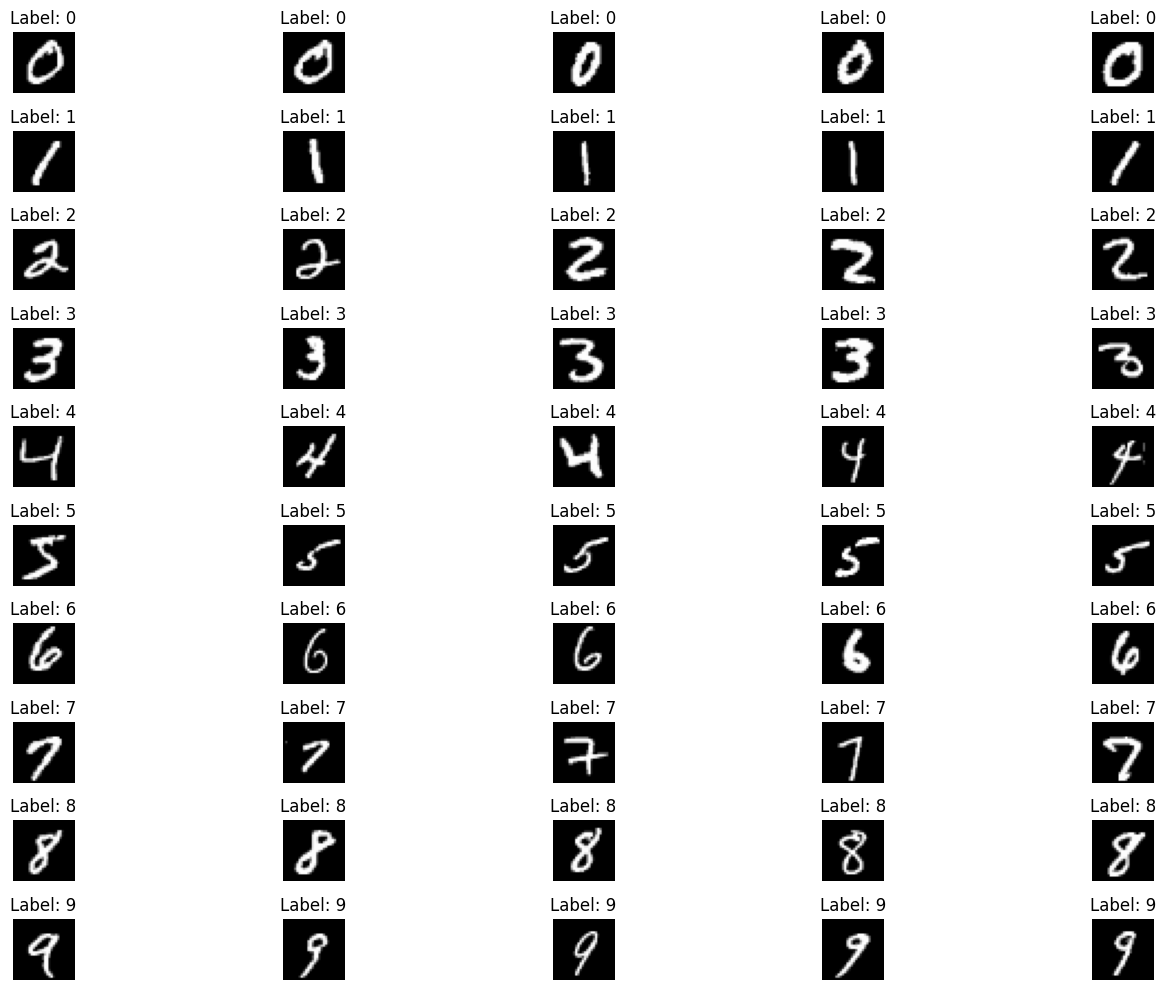

In [13]:
num_classes = 10
images_per_class = 5

plt.figure(figsize=(15, 10))

for class_label in range(num_classes):
    class_indices = np.where(y_train == class_label)[0]

    selected_indices = class_indices[:images_per_class]

    for i, idx in enumerate(selected_indices):
        subplot_index = class_label * images_per_class + i + 1

        plt.subplot(num_classes, images_per_class, subplot_index)
        plt.imshow(X_train[idx], cmap='gray')
        plt.title(f"Label: {class_label}")
        plt.axis('off')

plt.tight_layout()
plt.show()

The choice of Normalization technique greatly depends on our data. In general z-score provided the best overall results for our algorithm as seen in [[1]](https://www.researchgate.net/publication/371981092_Investigating_the_impact_of_data_scaling_on_the_k-nearest_neighbor_algorithm#:~:text=Three%20commonly%20used%20data%20scaling%20techniques%2C%20min-max%20normalization%2C,accuracy%2C%20precision%2C%20recall%2C%20F1-score%2C%20runtime%2C%20and%20memory%20usage.)

[1] Muasir Pagan, Muhammad Zarlis, Ade Candra. Investigating the impact of data scaling on the k-nearest neighbor algorithm. July 2023Computer Science and Information



In [14]:
from sklearn.preprocessing import StandardScaler

X_train_flattened = X_train.reshape(X_train.shape[0],-1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import time

results = []

start = time.time()

model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train_scaled, y_train)

y_pred_5 = model_5.predict(X_test_scaled)
accuracy_5 = accuracy_score(y_test, y_pred_5)

results.append({
    'neighbors': 5,
    'accuracy': accuracy_5
})

#----------------------------------------------
model_15 = KNeighborsClassifier(n_neighbors=15)
model_15.fit(X_train_scaled, y_train)

y_pred_15 = model_15.predict(X_test_scaled)
accuracy_15 = accuracy_score(y_test, y_pred_15)

results.append({
    'neighbors': 15,
    'accuracy': accuracy_15
})

#----------------------------------------------
model_51 = KNeighborsClassifier(n_neighbors=51)
model_51.fit(X_train_scaled, y_train)

y_pred_51 = model_51.predict(X_test_scaled)
accuracy_51 = accuracy_score(y_test, y_pred_51)

results.append({
    'neighbors': 51,
    'accuracy': accuracy_51
})

#----------------------------------------------
model_245 = KNeighborsClassifier(n_neighbors=245)
model_245.fit(X_train_scaled, y_train)

y_pred_245 = model_5.predict(X_test_scaled)
accuracy_245 = accuracy_score(y_test, y_pred_245)

print(f'Time elapsed is: {time.time()-start}')

results.append({
    'neighbors': 245,
    'accuracy': accuracy_245
})


Time elapsed is: 183.75198888778687


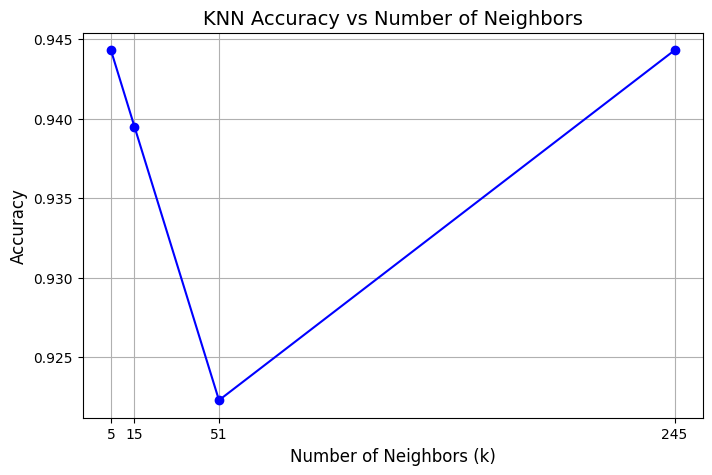

In [16]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.plot(results_df['neighbors'], results_df['accuracy'], marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs Number of Neighbors', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(results_df['neighbors'])
plt.show()

## 5. Importance of pixels

The foreqround in handwritten digits, is where most of the relevant information is contained for classification. These pixels contain the digit's shape and distinguish them from other pixels.

On the other hand, the backround pixels (black areas) are mostly irrelevant.

## 6-8. Dimensionality Reduction

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In general in sklearn we apply fit_transform on train and transform on test set. Applying fit function on test set will use information when determining the principal components (or any other parameter learned from the fit function) and should be avoided at all costs

In [18]:
results = []

start = time.time()

model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train_pca, y_train)

y_pred_5 = model_5.predict(X_test_pca)
accuracy_5 = accuracy_score(y_test, y_pred_5)

results.append({
    'neighbors': 5,
    'accuracy': accuracy_5
})

#----------------------------------------------
model_15 = KNeighborsClassifier(n_neighbors=15)
model_15.fit(X_train_pca, y_train)

y_pred_15 = model_15.predict(X_test_pca)
accuracy_15 = accuracy_score(y_test, y_pred_15)

results.append({
    'neighbors': 15,
    'accuracy': accuracy_15
})

#----------------------------------------------
model_51 = KNeighborsClassifier(n_neighbors=51)
model_51.fit(X_train_pca, y_train)

y_pred_51 = model_51.predict(X_test_pca)
accuracy_51 = accuracy_score(y_test, y_pred_51)

results.append({
    'neighbors': 51,
    'accuracy': accuracy_51
})

#----------------------------------------------
model_245 = KNeighborsClassifier(n_neighbors=245)
model_245.fit(X_train_pca, y_train)

y_pred_245 = model_5.predict(X_test_pca)
accuracy_245 = accuracy_score(y_test, y_pred_245)

print(f'Time elapsed is: {time.time()-start}')

results.append({
    'neighbors': 245,
    'accuracy': accuracy_245
})


Time elapsed is: 72.89534783363342


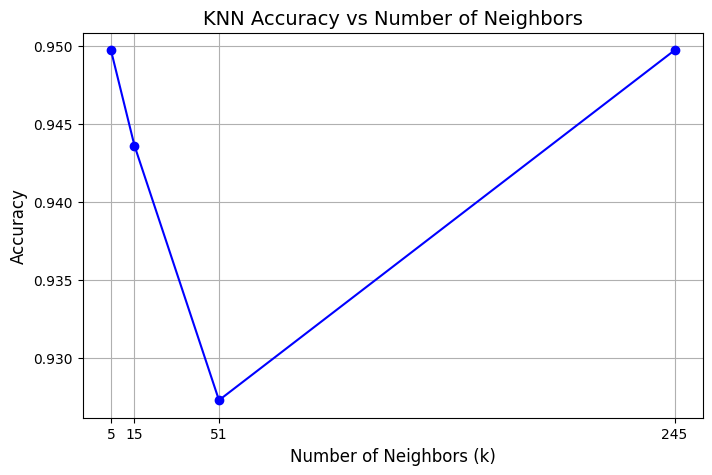

In [19]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.plot(results_df['neighbors'], results_df['accuracy'], marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs Number of Neighbors', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(results_df['neighbors'])
plt.show()

From what we can see there is a clear drop in execution time (from ~200 to ~70 seconds) and a subtle increase in accuracy thanks to PCA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

y_pred_lda = knn.predict(X_test_lda)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_lda))

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       980
           1       0.89      0.94      0.91      1135
           2       0.39      0.46      0.42      1032
           3       0.30      0.34      0.32      1010
           4       0.47      0.57      0.51       982
           5       0.43      0.41      0.42       892
           6       0.55      0.50      0.52       958
           7       0.57      0.58      0.57      1028
           8       0.23      0.14      0.17       974
           9       0.44      0.35      0.39      1009

    accuracy                           0.52     10000
   macro avg       0.50      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



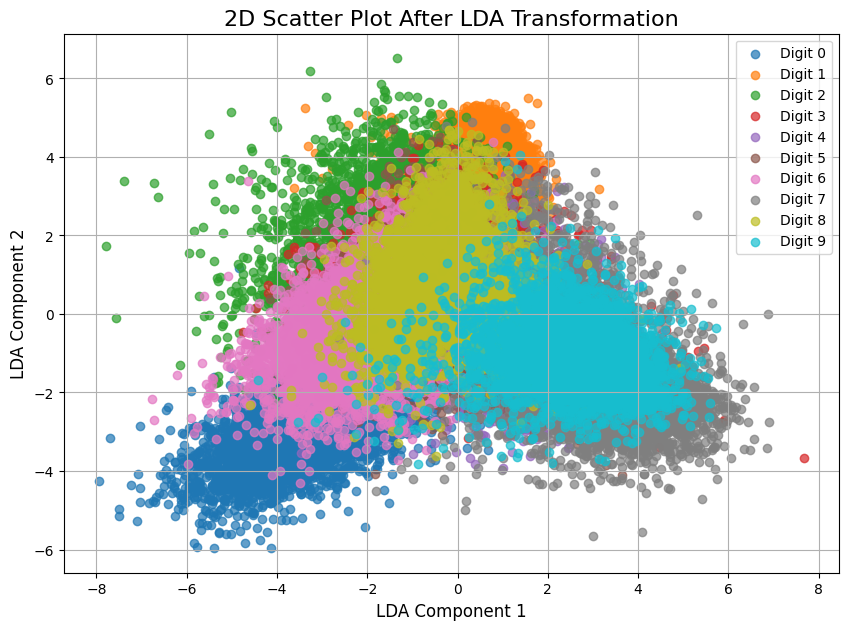

In [25]:
plt.figure(figsize=(10,7))
colors = plt.cm.tab10(np.arange(10))
for digit in range(10):
  mask = y_train == digit
  plt.scatter(X_train_lda[mask, 0], X_train_lda[mask, 1], label=f'Digit {digit}', alpha=0.7, color=colors[digit])

plt.title('2D Scatter Plot After LDA Transformation', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('LDA Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

From the scatter plot, we observe that we achieve good seperations on digits like 0 and 1 and overal on digits like 8, 6 and 3 which have similar features.